# Second NN Model - non-linear



In [ ]:
import torch
import sklearn
from torch import nn
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu" # set a device

def plt_predictions(train_data,
                     train_labels,
                     test_data ,
                     test_labels,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")

  plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Testing data")


  if predictions is not None:
    plt.scatter(test_data,predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 10})

## Dataset

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

# The make_circles function creates a dataset with coordinates shaped into a circle, n_samples = number of coordinates, noise = spread
c, l = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)
print(c.shape, c[:10, :], l[:10]) # c = coordinates, l = label, c[:,0] = x coordinate, c[:,1] = y coordinate

(1000, 2) [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]
 [-0.47964637  0.67643477]
 [-0.01364836  0.80334872]
 [ 0.77151327  0.14775959]
 [-0.16932234 -0.79345575]
 [-0.1214858   1.02150905]] [1 1 1 1 0 1 1 1 1 0]


In [ ]:
# Creates a DataFrame from the dataset
import pandas as pd

circles = pd.DataFrame({"X": c[:,0],
                        "Y": c[:,1],
                        "label": l})
circles.head(100) # Prints the first 100 rows

,X,Y,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
95,0.705162,-0.791401,0
96,-0.798092,-0.134062,1
97,0.405352,0.911272,0
98,0.656930,0.687583,0


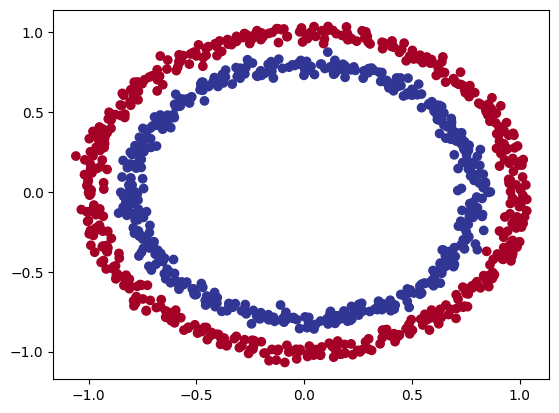

In [ ]:
# plt.scatter displays x and y points and assigns them a label (0 / 1)
plt.scatter(x=c[:, 0],
            y=c[:, 1],
            c = l,
            cmap = plt.cm.RdYlBu);

In [ ]:
c = torch.from_numpy(c).type(torch.float) # convert to float tensor for PyTorch
l = torch.from_numpy(l).type(torch.float)

In [ ]:
from sklearn.model_selection import train_test_split

# create the dataset and split it into 80% and 20%
x_train, x_test, y_train, y_test = train_test_split(c,
                                                    l,
                                                    test_size = 0.2, # 0.2 = 20% will be test and 80% trained
                                                    random_state = 42)

In [ ]:
len(x_train), len(x_test),
x_train.shape, x_train[:2], y_train[:2]

(torch.Size([800, 2]),
 tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347]]),
 tensor([1., 0.]))

# Model

In [ ]:
# Create our model, we will use nn.Sequential and layers
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)

    )

  def forward(self, c):
    return self.layers(c)

model_0 = CircleModel().to(device) # connect via instance and set device
model_0

CircleModel(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [ ]:
device

'cuda'

In [ ]:
# test prediction
with torch.inference_mode():
  y_preds = model_0(x_test.to(device))
y_preds[1]

tensor([0.1031], device='cuda:0')

In [ ]:
# create loss function
loss_fn = nn.BCEWithLogitsLoss()

# and optimizer
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr = 0.001)

In [ ]:
# create a function that calculates the accuracy of our model
def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [ ]:
# We will try prediction again, but to use the result, we need to convert it from logits (raw value) to a value between 0 and 1 using sigmoid (normalize)
model_0.eval()
with torch.inference_mode():
  y_logit = model_0(x_test.to(device))
y_logit[:]

In [ ]:
y_pred_probs = torch.round(torch.sigmoid(y_logit)) # normalize it using sigmoid
y_pred_probs[:5], y_test[:5]

(tensor([[1.],
         [1.],
         [0.],
         [1.],
         [1.]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.]))

## Vytvořte trainig loop


In [ ]:
# První zkuste sami a když si nebudete vědět rady dole je buňka s nápovědama


















































In [ ]:
# Define the number of epochs


# Set the device for our training tensors on which we want to train the model


# Create the loop


# Set the model to training mode


# Play The Unofficial PyTorch Optimization Loop Song: https://youtu.be/Nutpusq_AFw ;)
# Or create a forward pass, meaning send data to the model and get predictions; don't forget that you will get RAW data ;)


# Watch out for ValueError: Target size (torch.Size([800])) must be the same as input size (torch.Size([800, 1])). How do you convert a tensor([800, 1]) that came out of the model into this tensor([800])?

# Calculate the loss, and you can also calculate acc (Accuracy)


# Set the optimizer's gradient to zero


# Reverse engineering, or using the loss, we go back through our model and adjust the values


# Take a step in the optimizer


# We will try to evaluate the model, so we set the model to evaluation mode


# In inference, we will then create another Forward pass, sending test data to the model this time


# Don't forget to convert our RAW logit so that it is normalized


# Calculate Test Loss and Acc


# Print our output

# And that's it, it wasn't that hard, was it? EASY PEAZY XD.
# The model will not train correctly with default settings; it is enough to have a correct training loop and it will try to train

In [ ]:
# Download the helper_function.py library which contains many useful functions such as plot_predictions, plot_decision_boundary - and we will use this for our model's output

import requests
from pathlib import Path

# Download helper functions

if Path("helper_functions.py").is_file():
  print("file exist")
else:
  print("downloading")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

file exist


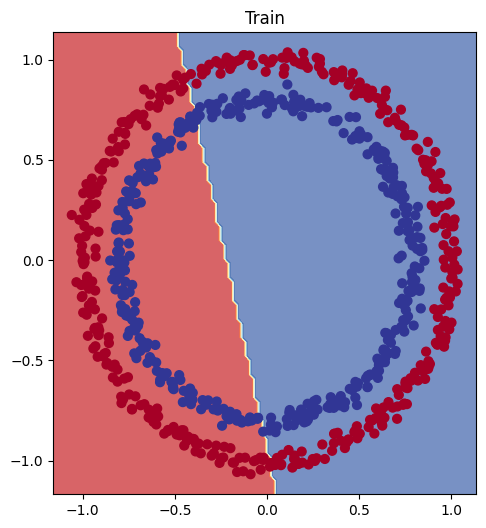

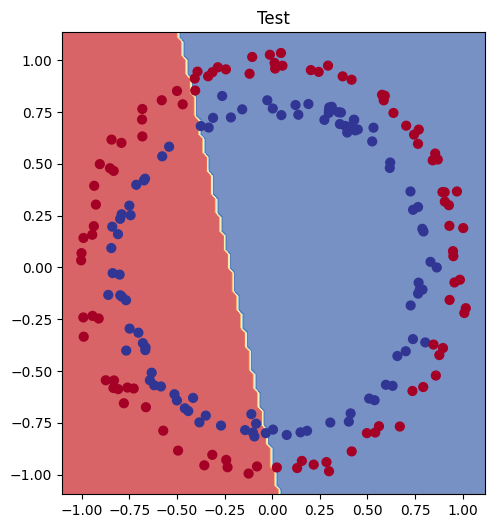

In [ ]:
# Adjust the parameters to fit your code

plt.figure(figsize = (12,6)) # set the display size
plt.subplot(1,2,1) # Determine the number of x and y axes
plt.title("Train") # Title

plot_decision_boundary(model_0, x_train, y_train) # use the function we downloaded, which will draw a plot with a blue area for 0 and a red area for 1

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model_0, x_test, y_test) # Adjust the parameters to fit your code

# BONUS

- Zkuste natrénovat model at zvládne non-linearitu
- Upravte model tak že tam přidáe pouze jednu vrstvu navíc a upravíte hidden layers (output a input features pro nn.Linear (Ale jen ty uprostřed neupravujte input layer a output layer))
- https://michael-franke.github.io/npNLG/04-ANNs/04d-MLP-pytorch.html#more-explicit-definition-nn-module
- https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity
- GLHF ;)